In [ ]:
import cv2
import os
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense,Activation,Dropout
from keras.preprocessing.image import load_img

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
train_path = '/content/drive/MyDrive/VN_food/train'
test_path = '/content/drive/MyDrive/VN_food/test'

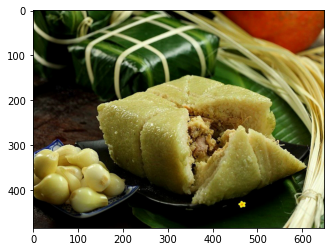

In [ ]:
img = load_img('/content/drive/MyDrive/VN_food/train/banhchung/banhchung (1).jpg')
rotated_image = img.rotate(0)
plt.imshow(rotated_image)

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
X_train = ImageDataGenerator(rescale=1/255)
X_test = ImageDataGenerator(rescale=1/255)

In [ ]:
train_dataset = X_train.flow_from_directory(
    directory=r"/content/drive/MyDrive/VN_food/train",
    target_size=(150, 150),
    batch_size=3,
    class_mode="categorical",
    )
test_dataset = X_test.flow_from_directory(
    directory=r"/content/drive/MyDrive/VN_food/test",
    target_size=(150, 150),
    batch_size=3,
    class_mode= "categorical",
    )

Found 433 images belonging to 10 classes.
Found 159 images belonging to 10 classes.


In [ ]:
train_dataset.class_indices

{'banhchung': 0,
 'banhcuon': 1,
 'banhmi': 2,
 'banhxeo': 3,
 'bunbo': 4,
 'buncha': 5,
 'bundaumamtom': 6,
 'chagio': 7,
 'comtam': 8,
 'goicuon': 9}

In [ ]:
from keras.layers.pooling import MaxPooling2D
from keras.backend import conv2d
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Conv2D,MaxPooling2D,Dropout
from keras.layers.core.flatten import Flatten

In [ ]:
from keras.layers.core.flatten import Flatten
model = Sequential([
    Conv2D(16,3, padding='same', activation='relu', input_shape=(150, 150, 3)),
    MaxPooling2D(),
    Dropout(0.2),
    Conv2D(32, 3, padding='same', activation='relu'),
    MaxPooling2D(),
    Conv2D(64, 3, padding='same', activation='relu'),
    MaxPooling2D(),
    Dropout(0.2),
    Conv2D(128, 3, padding='same', activation='relu'),
    MaxPooling2D(),
    Dropout(0.2),
    Conv2D(128, 3, padding='same', activation='relu'),
    MaxPooling2D(),
    Dropout(0.2),
    Flatten(),
    Dense(512, activation='relu'),
    Dense(10, activation='softmax')
])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 150, 150, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 75, 75, 16)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 75, 75, 16)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 75, 75, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 37, 37, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 37, 37, 64)        1

In [ ]:
model.compile(optimizer='adam',loss ='categorical_crossentropy',metrics =['accuracy'])
history=model.fit(train_dataset,epochs=30,batch_size=64,verbose=1,validation_data= test_dataset)

Epoch 1/30
145/145 [==============================] - 8s 44ms/step - loss: 0.4745 - accuracy: 0.8245 - val_loss: 1.6299 - val_accuracy: 0.5912
Epoch 2/30
145/145 [==============================] - 4s 25ms/step - loss: 0.4294 - accuracy: 0.8730 - val_loss: 1.7556 - val_accuracy: 0.5472
Epoch 3/30
145/145 [==============================] - 4s 25ms/step - loss: 0.2294 - accuracy: 0.9238 - val_loss: 1.7044 - val_accuracy: 0.6101
Epoch 4/30
145/145 [==============================] - 4s 25ms/step - loss: 0.3308 - accuracy: 0.8822 - val_loss: 1.4651 - val_accuracy: 0.5912
Epoch 5/30
145/145 [==============================] - 4s 25ms/step - loss: 0.2196 - accuracy: 0.9169 - val_loss: 1.7795 - val_accuracy: 0.6604
Epoch 6/30
145/145 [==============================] - 4s 25ms/step - loss: 0.1526 - accuracy: 0.9469 - val_loss: 2.0558 - val_accuracy: 0.6226
Epoch 7/30
145/145 [==============================] - 4s 25ms/step - loss: 0.1250 - accuracy: 0.9654 - val_loss: 1.9945 - val_accuracy: 0.6101

In [ ]:
model.save('vn_food_training.h5')

NameError: ignored

In [ ]:
from keras.models import load_model
model5 = load_model('vn_food_training.h5')

In [ ]:
import plotly.graph_objects as go
fig = go.Figure()

fig.add_trace(go.Scatter(x=history.epoch,
                         y=history.history['accuracy'],
                         mode='lines+markers',
                         name='Training accuracy'))
fig.add_trace(go.Scatter(x=history.epoch,
                         y=history.history['val_accuracy'],
                         mode='lines+markers',
                         name='Validation accuracy'))
fig.update_layout(title='Accuracy',
                  xaxis=dict(title='Epoch'),
                  yaxis=dict(title='Percentage'))
fig.show()

In [ ]:
labels = {0: 'banhchung',
          1: 'banhcuon',
          2:'banhmi',
          3:'banhxeo',
          4:'bunbo',
          5:'buncha',
          6:'bundaumamtom',
          7:'chagio',
          8:'comtam',
          9:'goicuon'}

Day la mon:  banhmi


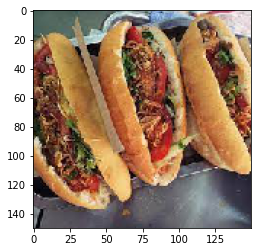

In [ ]:
from keras.preprocessing.image import load_img, img_to_array
img = load_img('/content/drive/MyDrive/VN_food/train/banhmi/banhmi (33).jpg', target_size =(150,150))
plt.imshow(img)
img = img_to_array(img)
img = img.reshape(1,150,150,3)
img = img.astype('float32')
img = img/255
img.shape
val = model5.predict(img)
np.argmax(val,axis= 1)
print('Day la mon: ', labels[np.argmax(val)])

Day la mon:  bundaumamtom


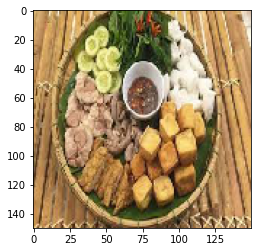

In [ ]:
from keras.preprocessing.image import load_img, img_to_array
img = load_img('/content/bundau (43).jpg', target_size =(150,150))
plt.imshow(img)
img = img_to_array(img)
img = img.reshape(1,150,150,3)
img = img.astype('float32')
img = img/255
img.shape
val = model5.predict(img)
np.argmax(val,axis= 1)
print('Day la mon: ', labels[np.argmax(val)])

Day la mon:  bunbo


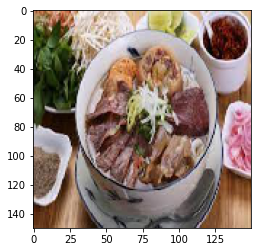

In [ ]:
from keras.preprocessing.image import load_img, img_to_array
img = load_img('/content/drive/MyDrive/VN_food/train/bunbo/bunbo (11).jpg', target_size =(150,150))
plt.imshow(img)
img = img_to_array(img)
img = img.reshape(1,150,150,3)
img = img.astype('float32')
img = img/255
img.shape
val = model5.predict(img)
np.argmax(val,axis= 1)
print('Day la mon: ', labels[np.argmax(val)])